In [1]:
import sys
sys.path.insert(0, '../dev_experiments/lib_REST_API/')


In [2]:
from evaluate_marks import EvaluateMarks

In [3]:
import pandas as pd

questions = pd.read_csv("./data/questions.csv", sep=",")
expected_answers = pd.read_csv("./data/expected_answers.csv", sep=",")
observed_answers = pd.read_csv("./data/observed_answers.csv", sep=",")
results = pd.read_csv("./data/results.csv", sep=",")
overall_results = pd.read_csv("./data/overall_result.csv", sep=",")

In [4]:
questions.head()

,question_id,question_text,marks
0,1,What is the difference between a text and a binary file?,2
1,2,Explain types of topology.,5
2,3,What is a database? Write the difference between DDL and DML commands.,4


In [5]:
len(expected_answers)
expected_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   question_id  3 non-null      int64  
 1   answer1      3 non-null      object 
 2   answer2      3 non-null      object 
 3   answer3      1 non-null      object 
 4   answer4      0 non-null      float64
 5   answer5      0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 272.0+ bytes


In [6]:
expected_answers = expected_answers.fillna("")
expected_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   question_id  3 non-null      int64 
 1   answer1      3 non-null      object
 2   answer2      3 non-null      object
 3   answer3      3 non-null      object
 4   answer4      3 non-null      object
 5   answer5      3 non-null      object
dtypes: int64(1), object(5)
memory usage: 272.0+ bytes


In [7]:
observed_answers = observed_answers.fillna("")
observed_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Student_id   24 non-null     object
 1   question_id  24 non-null     int64 
 2   answers      24 non-null     object
dtypes: int64(1), object(2)
memory usage: 704.0+ bytes


In [8]:
results = results.fillna(0)
results.head()

,student_id,question_id,expected_marks,observed_marks
0,nm1,1,2.0,0.0
1,nm1,2,5.0,0.0
2,nm1,3,1.0,0.0
3,nm2,1,1.5,0.0
4,nm2,2,3.5,0.0


In [9]:
overall_results = overall_results.fillna(0)
overall_results.head()

,student_id,expected_total_marks,observed_total_marks
0,nm1,8.0,0.0
1,nm2,7.0,0.0
2,nm3,10.0,0.0
3,nm4,6.0,0.0
4,m1,5.0,0.0


In [10]:
observed_answers.query("Student_id == 'nm1' and question_id==1")['answers'][0]

'Text file: Text files are human readable forms. The extension of text file is .txt. No module is required for text file. The modes required for text files are r, w, a, r+, w+, a+. Ex:- Note.txt, Example.txt.\nBinary file: Binary files are non-human readable. Binary files have extension of .dat. Pickle module is required for binary files. The modes required for binary files are rb, wb, ab, rb+, wb+, Ex:- '

In [11]:
questions[questions["question_id"]==1].marks[0]

2

In [12]:
# test
s = 'nm1'
q = 1
answer = observed_answers.query(f"Student_id == '{s}' and question_id=={q}")['answers'].values[0]
t_m = questions[questions["question_id"]==q].marks.values[0]

eval = EvaluateMarks(q, t_m, query=answer, grammar=False, database=expected_answers)
marks = eval.evaluate()
print(marks)
print(eval.run_checks())

{'score': 1.3333333333333333, 'tag': 'Not Toxic'}
[0.6525102257728577, 1.0, 0.0, 0]


In [13]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   student_id      24 non-null     object 
 1   question_id     24 non-null     int64  
 2   expected_marks  24 non-null     float64
 3   observed_marks  24 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes


In [14]:
toxic = []
for c,(s,q) in enumerate(list(zip(results['student_id'],results['question_id']))):
    answer = observed_answers.query(f"Student_id == '{s}' and question_id=={q}")['answers'].values[0]
    if answer:
        t_m = questions[questions["question_id"]==q].marks.values[0]
        eval = EvaluateMarks(q, t_m, query=answer, grammar=False, database=expected_answers)
        marks = eval.evaluate()
        if marks['tag'] == 'Toxic':
            toxic.append((s,q))
            continue
        i = results.query(f"student_id == '{s}' and question_id=={q}")['observed_marks'].index.values[0]
        observed_marks = marks['score']
    else:
        observed_marks = 0.0
    results.at[i,'observed_marks'] = observed_marks
    print(c+1, " ", (s,q), " - completed")

1   ('nm1', 1)  - completed
2   ('nm1', 2)  - completed
3   ('nm1', 3)  - completed
4   ('nm2', 1)  - completed
5   ('nm2', 2)  - completed
6   ('nm2', 3)  - completed
7   ('nm3', 1)  - completed
8   ('nm3', 2)  - completed
9   ('nm3', 3)  - completed
10   ('nm4', 1)  - completed
11   ('nm4', 2)  - completed
12   ('nm4', 3)  - completed
13   ('m1', 1)  - completed
14   ('m1', 2)  - completed
15   ('m1', 3)  - completed
16   ('m2', 1)  - completed
17   ('m2', 2)  - completed
18   ('m2', 3)  - completed
19   ('m3', 1)  - completed
20   ('m3', 2)  - completed
21   ('m3', 3)  - completed
22   ('m4', 1)  - completed
23   ('m4', 2)  - completed
24   ('m4', 3)  - completed


In [15]:
print(toxic)

[]


In [16]:
results

,student_id,question_id,expected_marks,observed_marks
0,nm1,1,2.0,1.333333
1,nm1,2,5.0,3.333333
2,nm1,3,1.0,2.666667
3,nm2,1,1.5,0.666667
4,nm2,2,3.5,3.333333
5,nm2,3,2.5,2.666667
6,nm3,1,2.0,0.666667
7,nm3,2,5.0,3.333333
8,nm3,3,3.0,2.666667
9,nm4,1,2.0,1.333333


<AxesSubplot: >

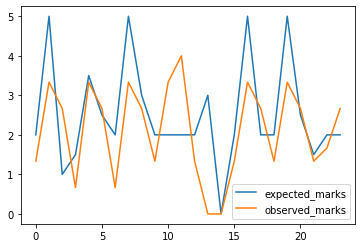

In [17]:
import matplotlib
results[['expected_marks', 'observed_marks']].plot.line()